In [12]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers, optimizers
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

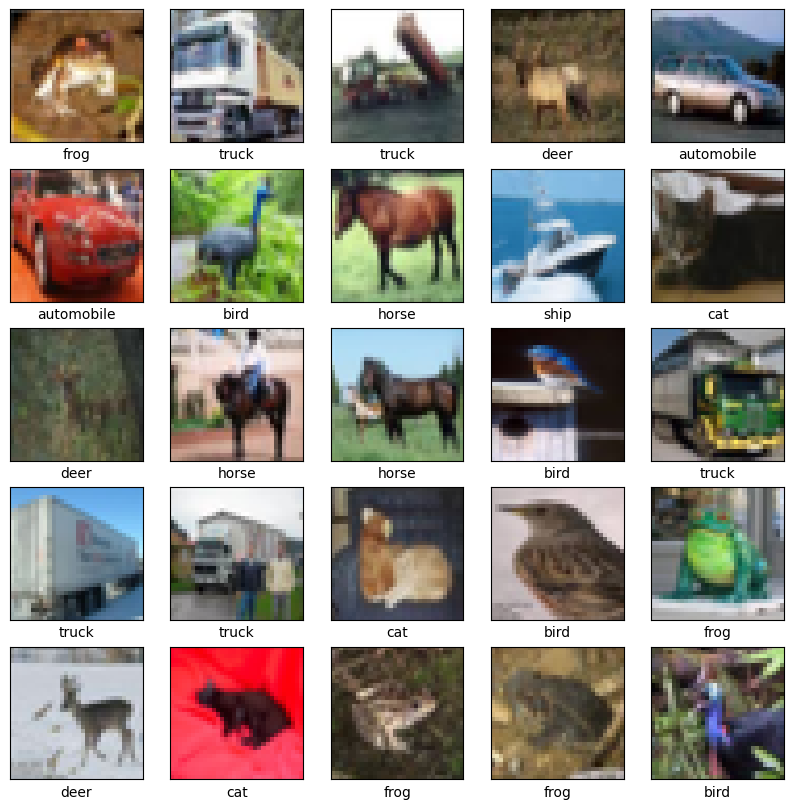

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/home/monika/PycharmProjects/masters/CDS/cds-ml/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1728374711.754746   30798 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-08 10:05:12.010285: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and se

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=40, 
                    validation_data=(test_images, test_labels))

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8232 - loss: 0.5038 - val_accuracy: 0.7174 - val_loss: 0.8866
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8364 - loss: 0.4712 - val_accuracy: 0.7036 - val_loss: 0.9489
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8446 - loss: 0.4438 - val_accuracy: 0.7119 - val_loss: 0.9471
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8528 - loss: 0.4139 - val_accuracy: 0.7189 - val_loss: 0.9974
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8644 - loss: 0.3857 - val_accuracy: 0.7193 - val_loss: 0.9877
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8729 - loss: 0.3613 - val_accuracy: 0.7096 - val_loss: 1.0231
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8820 - loss: 0.3321 - val_accuracy: 0.7199 - val_loss: 1.0615
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8899 -

313/313 - 1s - 3ms/step - accuracy: 0.6840 - loss: 2.5856


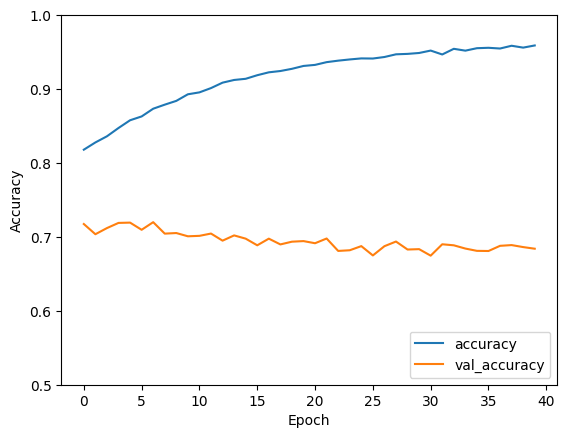

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [19]:
print(test_acc)

0.6840000152587891


 ## change relu to tanh()

In [22]:
model_v2 = models.Sequential()
model_v2.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
model_v2.add(layers.MaxPooling2D((2, 2)))
model_v2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model_v2.add(layers.MaxPooling2D((2, 2)))
model_v2.add(layers.Conv2D(64, (3, 3), activation='tanh'))

In [23]:
model_v2.add(layers.Flatten())
model_v2.add(layers.Dense(64, activation='tanh'))
model_v2.add(layers.Dense(10))

In [24]:
model_v2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_v2 = model_v2.fit(train_images, train_labels, epochs=40, 
                    validation_data=(test_images, test_labels))

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.4219 - loss: 1.6106 - val_accuracy: 0.5677 - val_loss: 1.2335
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6032 - loss: 1.1371 - val_accuracy: 0.6249 - val_loss: 1.0821
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6391 - loss: 1.0329 - val_accuracy: 0.6319 - val_loss: 1.0588
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6693 - loss: 0.9547 - val_accuracy: 0.6524 - val_loss: 1.0146
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6911 - loss: 0.8891 - val_accuracy: 0.6542 - val_loss: 1.0079
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7082 - loss: 0.8480 - val_accuracy: 0.6383 - val_loss: 1.0583
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7159 - loss: 0.8115 - val_accuracy: 0.6525 - val_loss: 1.0267
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7380 -

313/313 - 1s - 3ms/step - accuracy: 0.6840 - loss: 2.5856


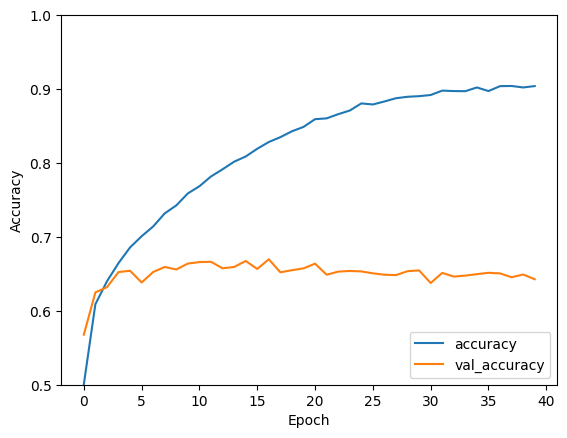

In [25]:
plt.plot(history_v2.history['accuracy'], label='accuracy')
plt.plot(history_v2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [26]:
print(test_acc)

0.6840000152587891


Explanation: Tanh is reaching same accuracy as ReLu but slower because the gradient gets smaller   

# Comparison of optimizers
### SGD:

In [28]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))
    return model
    

In [29]:
model_v3 = create_model()
model_v3.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_v3 = model_v3.fit(train_images, train_labels, epochs=40, 
                    validation_data=(test_images, test_labels))

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.1658 - loss: 2.2028 - val_accuracy: 0.3100 - val_loss: 1.9090
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3646 - loss: 1.7758 - val_accuracy: 0.4336 - val_loss: 1.5969
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4418 - loss: 1.5479 - val_accuracy: 0.4769 - val_loss: 1.4308
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4990 - loss: 1.3963 - val_accuracy: 0.4992 - val_loss: 1.3616
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5423 - loss: 1.2888 - val_accuracy: 0.5533 - val_loss: 1.2530
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5672 - loss: 1.2200 - val_accuracy: 0.5234 - val_loss: 1.3606
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5957 - loss: 1.1530 - val_accuracy: 0.5990 - val_loss: 1.1433
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6185 -

In [30]:
def display_stats(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    print(f'test accuracy: {test_acc}')

313/313 - 1s - 4ms/step - accuracy: 0.6840 - loss: 2.5856
test accuracy: 0.6840000152587891


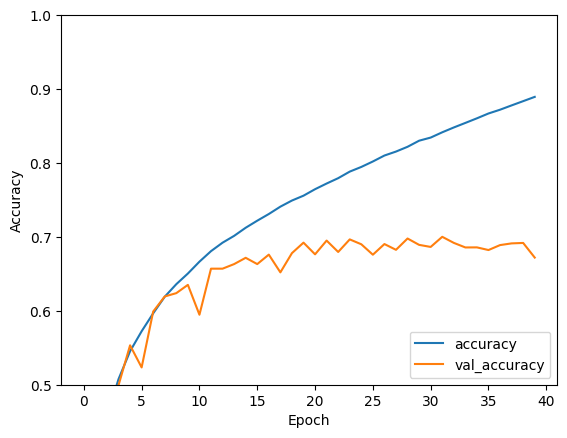

In [31]:
display_stats(history_v3)

4. Running the model as an MLP with the same parameters as the CNN model

In [13]:
# num params in our cnn model: 122_570

model_match = models.Sequential([
  layers.Flatten(),
  layers.Dense(40, activation = "relu"),
  layers.Dense(10, activation = "softmax")
])

model_match.compile(optimizer = optimizers.Adam(learning_rate=1e-3, decay=2), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model_match.build(train_images.shape)
model_match.summary()

history = model_match.fit(train_images, train_labels, epochs=1000,
                        validation_data = (test_images, test_labels))



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (50000, 3072)             0         
_________________________________________________________________
dense_14 (Dense)             (50000, 40)               122920    
_________________________________________________________________
dense_15 (Dense)             (50000, 10)               410       
Total params: 123,330
Trainable params: 123,330
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2967 - accuracy: 0.1219 - val_loss: 2.2839 - val_accuracy: 0.1306
Epoch 2/1000
1563/1563 [==============================] - 1s 820us/step - loss: 2.2807 - accuracy: 0.1342 - val_loss: 2.2785 - val_accuracy: 0.1386
Epoch 3/1000
1563/1563 [==============================] - 1s 795us/step - loss: 2.27

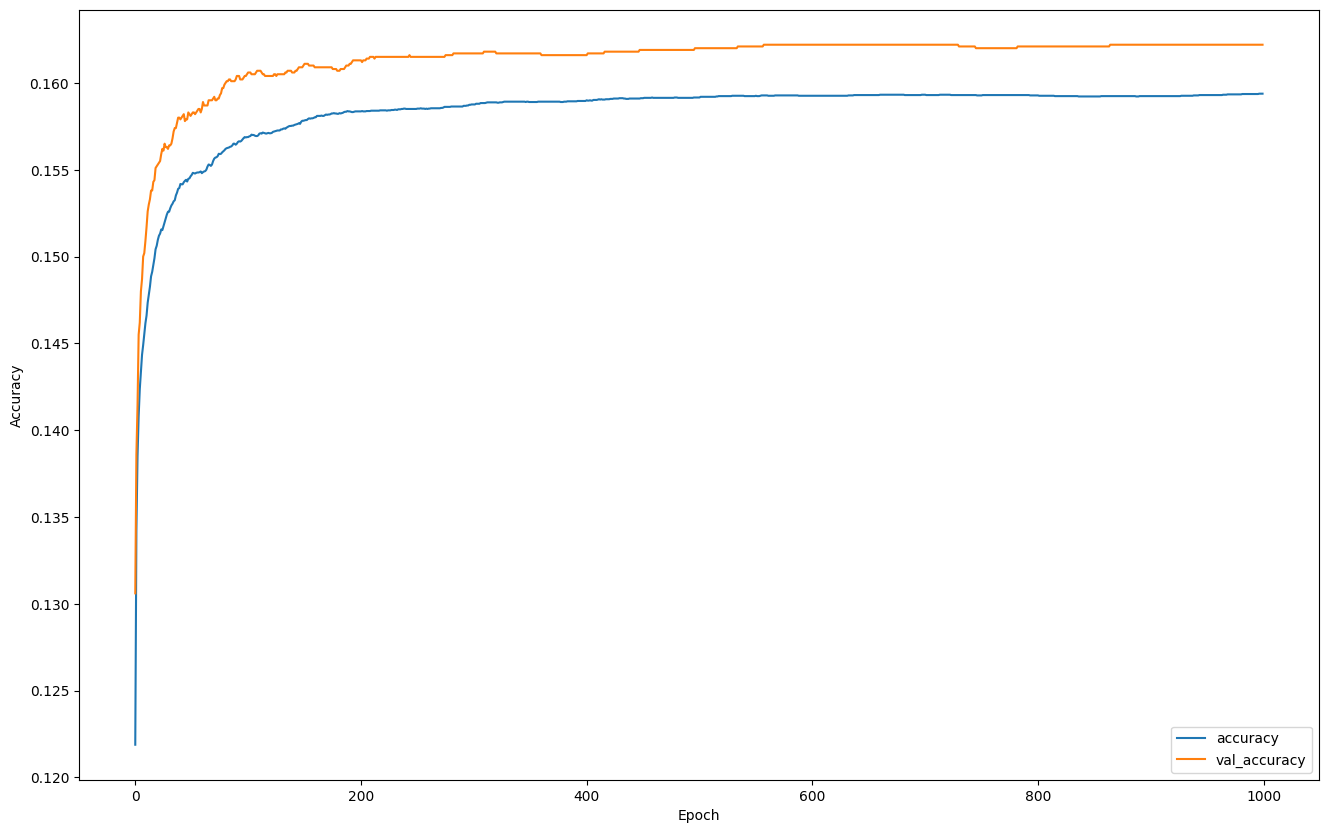

In [14]:
plt.figure(figsize=(16,10))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()